# Studying Music Preference by Studying Song Attributes

### Problem Statement

Context: The Spotify Song Recommendation feature is enabled by user data to display or recommend songs based on what has been liked or disliked. The goal of this project is to analyze the songs that have been liked in order to gain a clear understanding of a similar song that a user may like, with the goal of making proper song recommnendations to distinct users.

#### Libraries and Packages

In [37]:
import pandas as pd # Data manipulation/Data structure
import numpy as np #multi-dimensional array
import matplotlib.pyplot as plt #Plotting Library
import seaborn as sns # cool data viz remember that it is similar to matplotlib just offers more cool stuff

#### Load Data


In [38]:
df = pd.read_csv("Spotify.csv")
df



,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### Data Overview

In [39]:
# I want to look at the first 10 rows of data !
df.head(n=10)
display(df.head(n=10))

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [40]:
# Studying the Shape of the data
# (Rows, Columns)

df.shape

(2017, 17)

In [41]:
#Study all of the information about the data
# df.info() allows me to see the data types, and the total and also determine any null values are present
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [42]:
#Statistics of the Data

df.describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [43]:
#Study if there are any null values
df.isnull().values.any()


False

In [44]:
df.isnull().sum().sum()

0

In [45]:
# Check if there are duplicated values in the data
df.duplicated().sum()

0

In [46]:
#Check for Outliers
df.skew()
#Will tell us if it is left or right skewed

/var/folders/tz/hd50xl2d7h94jn5x97vfhfx40000gn/T/ipykernel_23627/548411210.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0          0.000000
acousticness        1.658393
danceability       -0.419610
duration_ms         2.499012
energy             -0.913010
instrumentalness    1.952755
key                -0.009360
liveness            1.952703
loudness           -2.226556
mode               -0.461301
speechiness         2.309581
tempo               0.439058
time_signature     -2.234521
valence             0.078390
target             -0.022825
dtype: float64

In [47]:
# Statistical Description of Numerical Variables
# Studying specific attributes of the data.
# Describe the variable energy. Tells us if we need further data cleaning

df["energy"].describe()

count    2017.000000
mean        0.681577
std         0.210273
min         0.014800
25%         0.563000
50%         0.715000
75%         0.846000
max         0.998000
Name: energy, dtype: float64

In [48]:
df["danceability"].describe()

count    2017.000000
mean        0.618422
std         0.161029
min         0.122000
25%         0.514000
50%         0.631000
75%         0.738000
max         0.984000
Name: danceability, dtype: float64

In [49]:
df["speechiness"].describe()

count    2017.000000
mean        0.092664
std         0.089931
min         0.023100
25%         0.037500
50%         0.054900
75%         0.108000
max         0.816000
Name: speechiness, dtype: float64

In [50]:
# Display unique values of one Categorial Variables
# Find unique artists who are prevalently used by the current users
df.artist.unique

<bound method Series.unique of 0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
              ...       
2012      Kill The Noise
2013      Dillon Francis
2014            Rain Man
2015          Twin Moons
2016           Bleachers
Name: artist, Length: 2017, dtype: object>

In [51]:
df.artist.nunique

<bound method IndexOpsMixin.nunique of 0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
              ...       
2012      Kill The Noise
2013      Dillon Francis
2014            Rain Man
2015          Twin Moons
2016           Bleachers
Name: artist, Length: 2017, dtype: object>

In [52]:
# Create a list of unique Categorical Variable
# Unique artists who have secured most likes
display(df['artist'].unique().tolist())

['Future',
 'Childish Gambino',
 'Beach House',
 'Junior Boys',
 'Drake',
 'Omega',
 'Death Grips',
 'Honey Claws',
 'The Avalanches',
 'Modern Folk Üçlüsü',
 'Erkin Koray',
 'Lil Yachty',
 'PNL',
 'Crystal Castles',
 'New Order',
 'Funkadelic',
 'Chief Keef',
 'Le Youth',
 'Cajmere',
 'The Rapture',
 'Young Thug',
 'Ty Segall',
 'Myron & E',
 'TR/ST',
 'A-Trak',
 'Rae Sremmurd',
 'Father',
 '2milly',
 'Ty Dolla $ign',
 'Santigold',
 'Three 6 Mafia',
 'Beyoncé',
 'Rockwell',
 'Disclosure',
 'ILoveMakonnen',
 'Riff Raff',
 'Kanye West',
 'Young M.A.',
 'Mark Morrison',
 'William Onyeabor',
 'Dr. John',
 'T. P. Orchestre Poly-Rythmo',
 'Ebo Taylor',
 'Neon Indian',
 'Future Islands',
 'Leon Bridges',
 'Post Malone',
 'Jamie xx',
 'A$AP Rocky',
 'Vince Staples',
 'Best Coast',
 "Ariel Pink's Haunted Graffiti",
 'Bobby "Blue" Bland',
 'Yacht Club',
 'Portugal. The Man',
 'Umit Aksu Orkestrasi',
 'Sweet Valley',
 'CHVRCHES',
 'Caribou',
 'Ezale',
 'Disciples',
 'Amadou & Mariam',
 'Dusty Sp

In [53]:
# Identify by the Data Problem Statement the top occurances of 'artist' with dependent and independent variables

df.groupby('artist').filter(lambda g: (g.nunique() > 10).any())

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
37,37,0.056500,0.853,205879,0.547,0.000000,1,0.3410,-7.535,1,0.1940,142.065,4.0,0.677,1,Jumpman,Drake
40,40,0.000410,0.731,324541,0.852,0.625000,11,0.3580,-6.080,1,0.0476,125.008,4.0,0.622,1,Bang That,Disclosure
102,102,0.247000,0.525,292760,0.643,0.000000,5,0.1060,-6.874,0,0.8160,199.727,4.0,0.943,1,Willing & Able,Disclosure
117,117,0.002570,0.896,267024,0.623,0.000258,2,0.0390,-8.008,1,0.0571,134.962,4.0,0.564,1,Hotline Bling,Drake
123,123,0.000758,0.695,253773,0.912,0.000103,10,0.3020,-3.331,0,0.1930,160.043,4.0,0.612,1,Movin' Bass - GTA Remix,Rick Ross
133,133,0.066800,0.704,199246,0.647,0.000002,10,0.1010,-7.874,0,0.1710,92.002,4.0,0.694,1,Magnets,Disclosure
154,154,0.001570,0.790,217707,0.676,0.000000,8,0.2500,-6.432,0,0.2710,132.002,4.0,0.314,1,Big Rings,Drake
158,158,0.190000,0.735,275840,0.410,0.000000,11,0.3410,-8.735,0,0.2000,114.812,4.0,0.160,1,Know Yourself,Drake


#### Missing Values, Missing Value Imputation, Removal of Variables
The Data did not contain missing values thus we dont need to perform a data quality check, there are duplicate 'artists' in our data that need to be dropped and the first variable in our data set, seems to be irrelevant and just repeates numbers. This can be removed as it does not add value to our analysis.

In [54]:
df.drop(['Unnamed: 0' ] ,  axis = 1, inplace=True)
display(df)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [55]:
#Due to the removal of this column, check for duplicates. If there are, remove them from my data set.
print(df.duplicated().sum())

5


In [56]:
df = df.drop_duplicates() # This step removes them from my data frame (where the data is stored)

#### Data Distributon & Visualizaton - Attributes & Key Features

##### The data is comprised of both Numerical and Categorical Values.  Numerical values are both discreat and continues. 

In [57]:
# Differentiate between the Numerical (Discrete and Continuous) and Categorical variables (didnt label the categorical here)
# Look at df.info and separate into discrete and continous
cont_cols = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'tempo', 'valence', 'speechiness', 'instrumentalness']
cont_cols

discrete_cols = ['key', 'mode', 'time_signature', 'target']
discrete_cols

['key', 'mode', 'time_signature', 'target']

#### I want to determine which feature will allow me to choose a particular song that has a higher chance of being "liked" by the listener


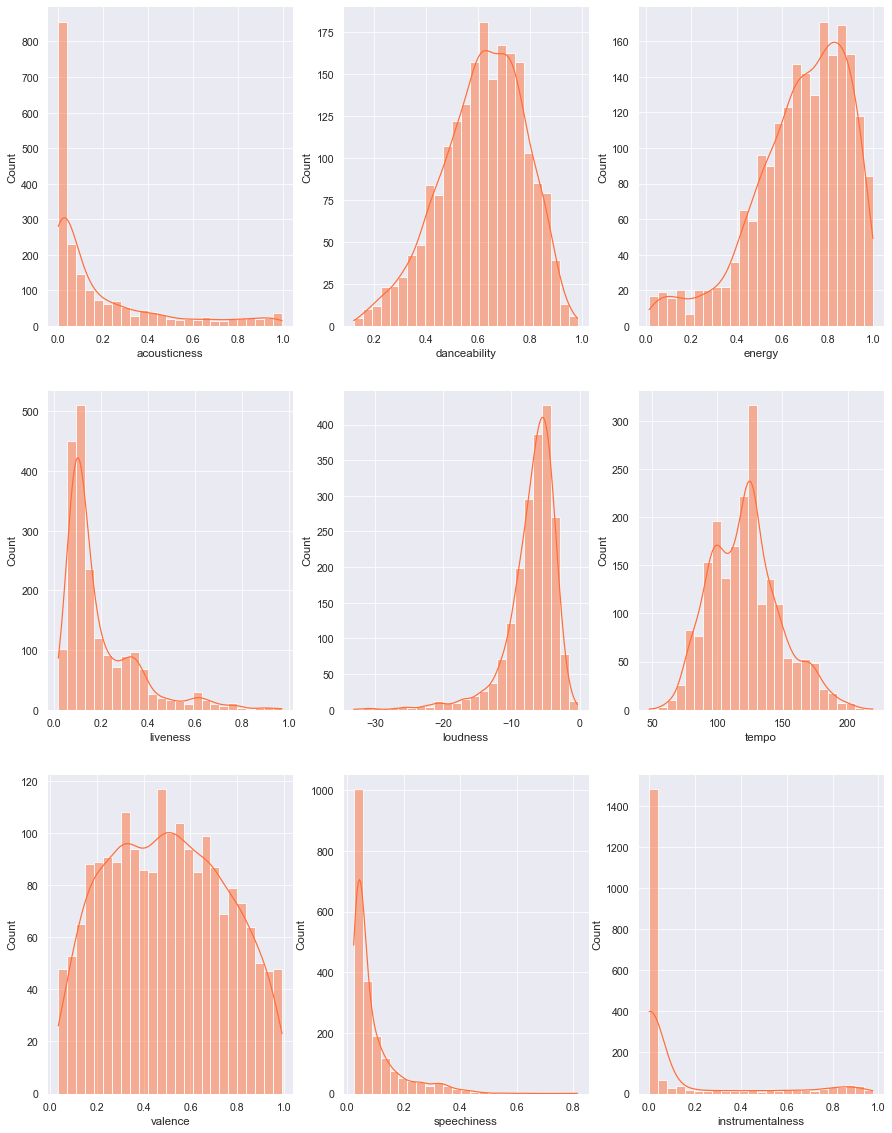

In [58]:
sns.set_palette("rainbow_r")
fig, axes = plt.subplots(3,3,figsize=(15,20))
axes = axes.flatten()
ax_no = 0
num_cols = cont_cols
for col in num_cols:
    sns.histplot(data = df, x=col, bins = 25, kde = True, ax = axes[ax_no])
    ax_no += 1
plt.show()

In [59]:
sns.set_style('darkgrid') #Set the parameters that control the general style of the plots, color of the background.
sns.set_context('paper', font_scale = 1.2) #Set the parameters that control the scaling of plot elements.


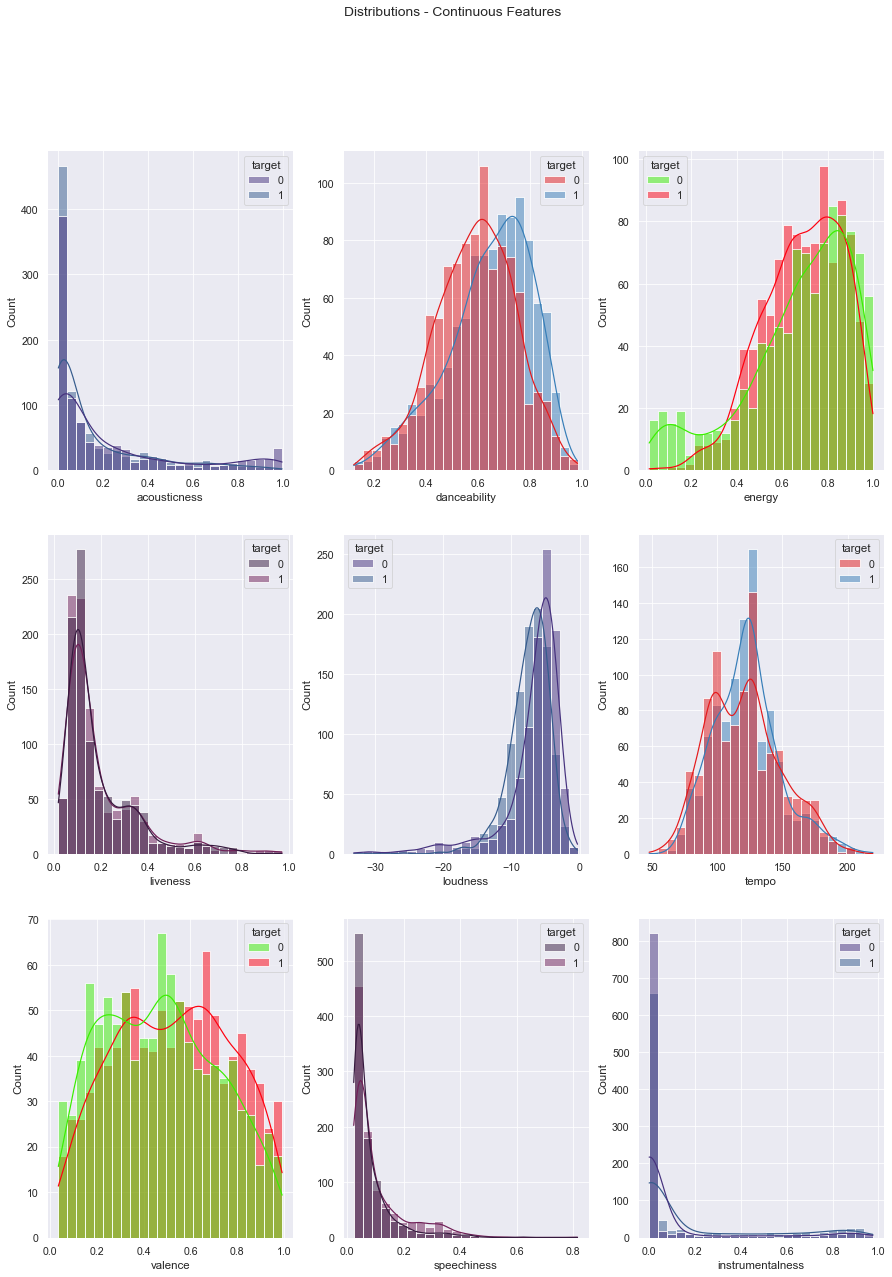

In [60]:
fig, axes = plt.subplots(3,3,figsize=(15,20))
palettes = ['viridis','Set1', 'prism', 'rocket']
axes = axes.flatten()
ax_no = 0
for col in cont_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.histplot(data = df, x=col, hue='target', bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
fig.suptitle('Distributions - Continuous Features')
plt.show()



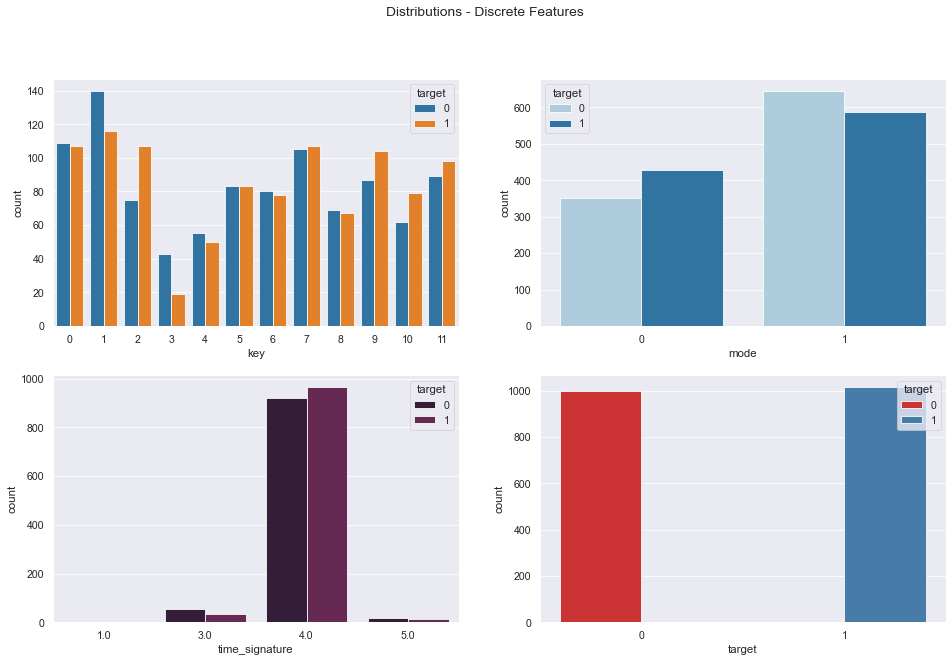

In [61]:
sns.set_palette("Set1")
fig, axes = plt.subplots(2,2,figsize=(16,10))
palettes = ['tab10', 'Paired', 'rocket', 'Set1']
axes = axes.flatten()
ax_no = 0
for col in discrete_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.countplot(data = df, x= col, ax = axes[ax_no], hue='target')
    ax_no += 1
fig.suptitle('Distributions - Discrete Features')
plt.show()

Discrete Variables Meaning?

These variables are features and are 
Key: key that the track is in
Time Signature: Time signature of track, it essentially looks at how many beats are in a bar
Mode: modality of track, major is 1 and minor is 0
Target: Label for song


#### Normalize or Standardize Data

#### Model (Classification Algorithm, Confusion Matrix)

#### Model Complexity Study

#### Conclusion